In [1]:
##import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

Text(0, 0.5, 'Y dataset')

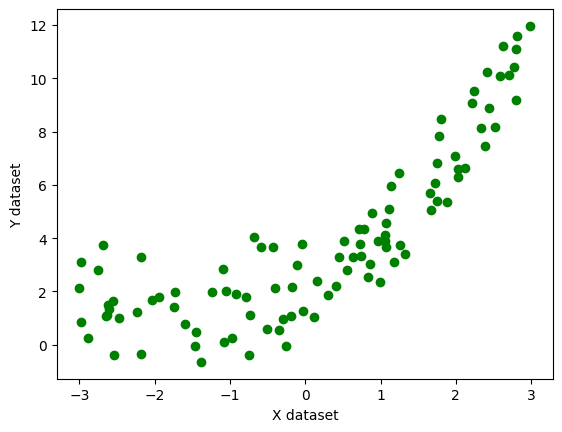

In [2]:
X = 6 * np.random.rand(100, 1) - 3
y =0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)
# quadratic equation used- y=0.5x^2+1.5x+2+outliers
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [4]:
## Lets implement Simple Linear Regression
from sklearn.linear_model import LinearRegression
regression_1=LinearRegression()

In [5]:
regression_1.fit(X_train,y_train)

LinearRegression()

In [6]:
from sklearn.metrics import r2_score
score=r2_score(y_test,regression_1.predict(X_test))
print(score)

0.6635851530657604


Text(0, 0.5, 'Y')

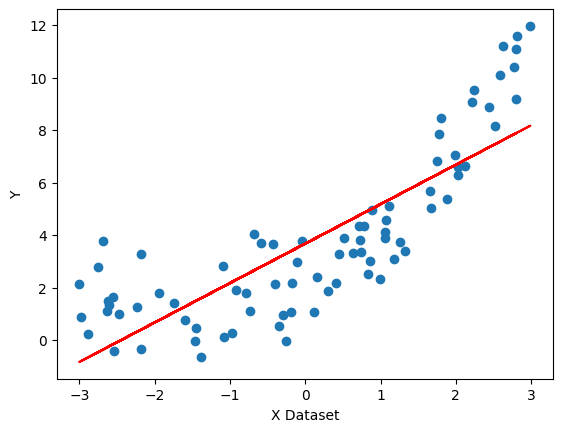

In [7]:
## Lets visualize this model
plt.plot(X_train,regression_1.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.xlabel("X Dataset")
plt.ylabel("Y")

In [8]:
#LEts apply polynomial transformation
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [9]:
X_train_poly

array([[ 1.00000000e+00,  1.54784946e-01,  2.39583796e-02],
       [ 1.00000000e+00,  2.99088208e+00,  8.94537561e+00],
       [ 1.00000000e+00,  8.63896297e-01,  7.46316811e-01],
       [ 1.00000000e+00, -2.17637710e+00,  4.73661727e+00],
       [ 1.00000000e+00,  2.76976617e+00,  7.67160466e+00],
       [ 1.00000000e+00,  6.40720914e-01,  4.10523290e-01],
       [ 1.00000000e+00, -4.28230432e-01,  1.83381303e-01],
       [ 1.00000000e+00, -2.68462354e+00,  7.20720358e+00],
       [ 1.00000000e+00, -1.76096408e-01,  3.10099449e-02],
       [ 1.00000000e+00,  2.79931963e+00,  7.83619036e+00],
       [ 1.00000000e+00, -2.63687606e+00,  6.95311538e+00],
       [ 1.00000000e+00,  1.80705872e+00,  3.26546123e+00],
       [ 1.00000000e+00, -2.18461533e+00,  4.77254416e+00],
       [ 1.00000000e+00,  8.31163386e-01,  6.90832575e-01],
       [ 1.00000000e+00,  2.24756381e+00,  5.05154306e+00],
       [ 1.00000000e+00,  2.79845064e+00,  7.83132600e+00],
       [ 1.00000000e+00,  1.26340770e+00

In [10]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.8992707094459845


In [11]:
print(regression.coef_)

[[0.         1.55861528 0.507112  ]]


In [12]:
print(regression.intercept_)

[2.11440838]


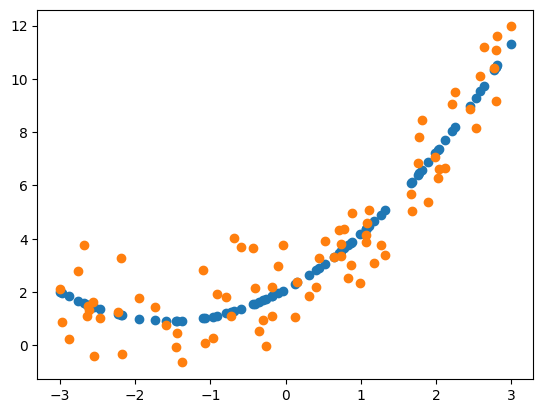

In [13]:
plt.scatter(X_train,regression.predict(X_train_poly))
plt.scatter(X_train,y_train)

In [14]:
poly=PolynomialFeatures(degree=3,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [15]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.8924279278133675


In [16]:
#3 Prediction of new data set
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

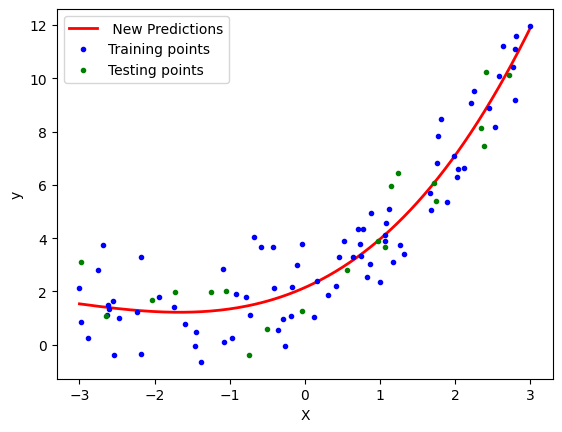

In [17]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()